In [1]:
# import dependencies
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# load in data
crypto = pd.read_csv("crypto_data.csv")
crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# IsTrading == true
crypto_istrading = crypto.loc[crypto['IsTrading']==True]

# drop IsTrading column
crypto_istrading = crypto_istrading.drop(labels='IsTrading', axis=1)

# drop any null values
crypto_istrading = crypto_istrading.dropna(how="any")

In [4]:
# filter for mined coines only
mined_df = crypto_istrading.loc[crypto['TotalCoinsMined']>0]

# remove CoinName and unneccessary column
mined_df = mined_df.drop(labels='CoinName', axis=1)
mined_df = mined_df.drop(labels='Unnamed: 0', axis=1)

In [5]:
mined_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [6]:
mined_df.astype({'TotalCoinSupply': 'float'}).dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [7]:
dummies_df = pd.DataFrame()
dummies_df = pd.get_dummies(data=mined_df, columns=['Algorithm', 'ProofType'])

In [8]:
dummies_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dummies_df.astype({'TotalCoinSupply': 'float'}).dtypes

TotalCoinsMined                     float64
TotalCoinSupply                     float64
Algorithm_1GB AES Pattern Search      uint8
Algorithm_536                         uint8
Algorithm_Argon2d                     uint8
                                     ...   
ProofType_Proof of Authority          uint8
ProofType_Proof of Trust              uint8
ProofType_TPoS                        uint8
ProofType_Zero-Knowledge Proof        uint8
ProofType_dPoW/PoW                    uint8
Length: 98, dtype: object

### Dimensionality Reduction

In [10]:
# scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dummies_df)
print(scaled_df.shape)

(532, 98)


In [11]:
# PCA
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(scaled_df)
print(sum(pca.explained_variance_ratio_))

0.901087063826843


c:\users\james\anaconda3\envs\datacourse38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\james\anaconda3\envs\datacourse38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\james\anaconda3\envs\datacourse38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\james\anaconda3\envs\datacourse38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\james\anaconda3\envs\datacourse38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnin

<function matplotlib.pyplot.show(close=None, block=None)>

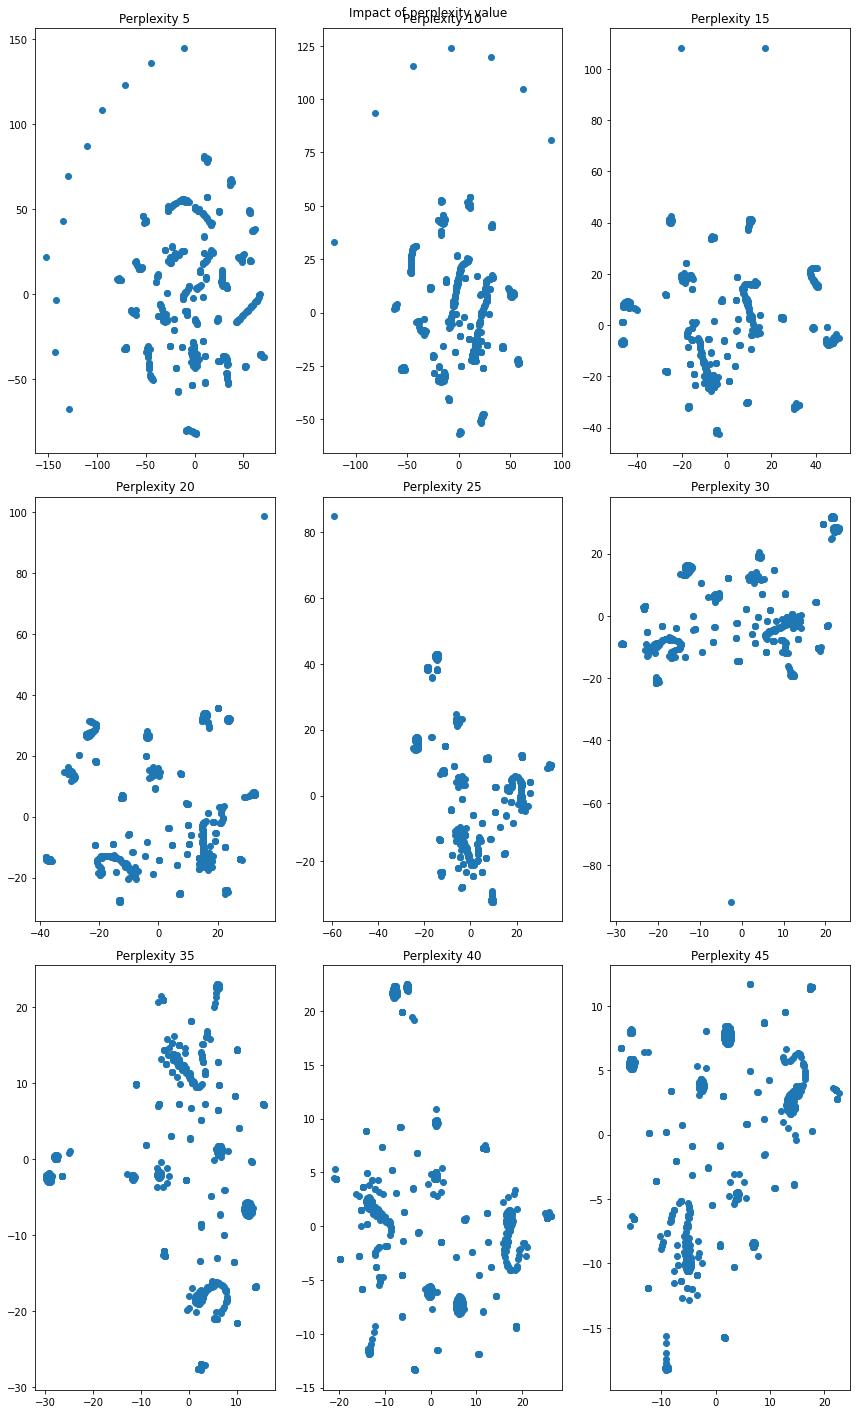

In [16]:
fig, ax = plt.subplots(3,3,figsize=(12,20))
fig.suptitle("Impact of perplexity value")

perplex = [5,10,15,20,25,30,35,40,45]

for plot in range (len(perplex)):
    row = int(plot/3)
    col = plot % 3
    tsne = TSNE(n_components=2, perplexity=perplex[plot])
    crypto_tsne = tsne.fit_transform(crypto_pca)
    
    ax[row, col].scatter(x=crypto_tsne[:,0], y=crypto_tsne[:,1])
    plot_title = f"Perplexity {perplex[plot]}"
    ax[row, col].set_title(plot_title) 

fig.tight_layout() 
plt.show

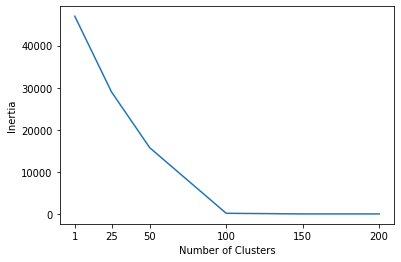

In [13]:
inertia = []
clusters = [1,25,50,100,150,200]
# Looking for the best k
for cluster in clusters:
    km = KMeans(n_clusters=cluster, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.plot(clusters, inertia)
plt.xticks(clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Recommendation

It is not recommended to cluster the cryptocurrencies together - 100 clusters are required before the elbow curve flattens. This would suggest that analysis from clustering would not be useful. 